In [31]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [32]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [8 0 4 1 1 0 8 8 7 1]


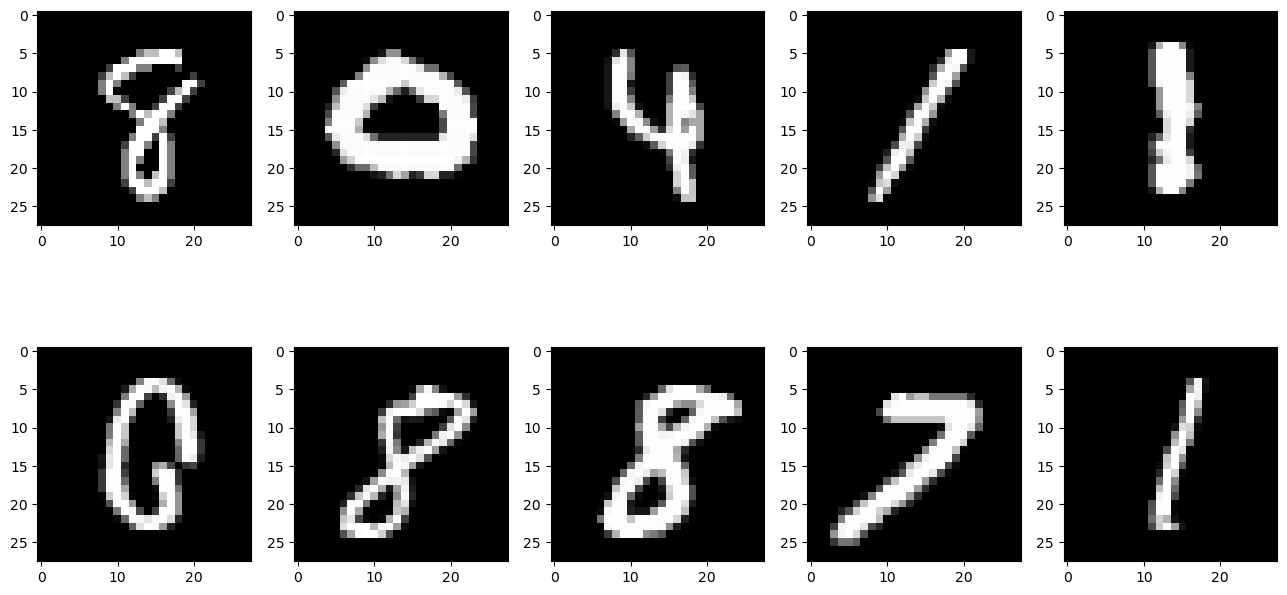

In [33]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [34]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [52]:
from keras.layers import  BatchNormalization, Dropout
from keras.regularizers import l1_l2

l1_coeff = 0.0001
l2_coeff = 0.0001


model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1_coeff, l2_coeff)))
# model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1_coeff, l2_coeff)))
# model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1_coeff, l2_coeff)))
# model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 128)               100480    
                                                                 
 dropout_27 (Dropout)        (None, 128)               0         
                                                                 
 dense_53 (Dense)            (None, 128)               16512     
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_54 (Dense)            (None, 64)                8256      
                                                                 
 dropout_29 (Dropout)        (None, 64)              

Train the model

In [ ]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.6509 - accuracy: 0.9091
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4242 - accuracy: 0.9533
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3702 - accuracy: 0.9593
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3414 - accuracy: 0.9609
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3159 - accuracy: 0.9650
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3049 - accuracy: 0.9652
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2914 - accuracy: 0.9673
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2907 - accuracy: 0.9653
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2833 - accuracy: 0.9667
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.27

Plot the loss and accuracy graphs

In [ ]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

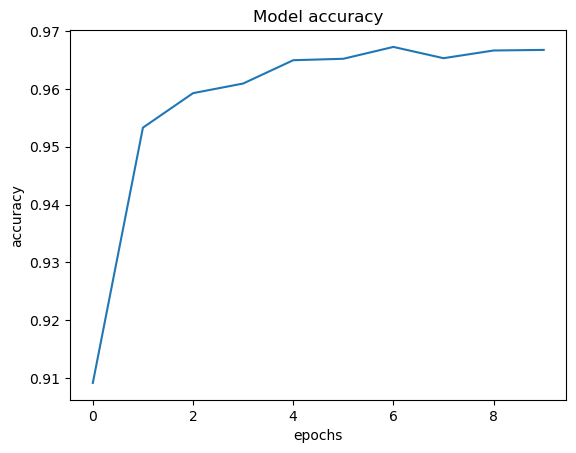

In [56]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [57]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2540 - accuracy: 0.9719
Loss of the Test dataset is: 0.2539798617362976
Accuracy of the test dataset is: 0.9718999862670898


Save the model weights

In [ ]:
model.save_weights('MNIST_WEIGHTS_V1.h5')